In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:

df = pd.read_csv('/Users/mdkaif/Documents/projects/deep_learning/Nootebooks/data/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


so here we dont need the RowNumber , CustomerID and Surname for the predicting the exited column ( the customer who leave ) so we make this


In [4]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [5]:
df.shape

(10000, 11)

In [6]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

there is now any nun value in the data set that is good 

t

In [7]:
df.duplicated().sum()

0

also there is no duplicate in the data set

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


there is only two object data set or the character dataset

In [12]:
df['Geography'].value_counts() , df['Gender'].value_counts()

(Geography
 France     5014
 Germany    2509
 Spain      2477
 Name: count, dtype: int64,
 Gender
 Male      5457
 Female    4543
 Name: count, dtype: int64)

In [13]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

We have 2 categorical features : ['Geography', 'Gender']


**Visualization of the data**

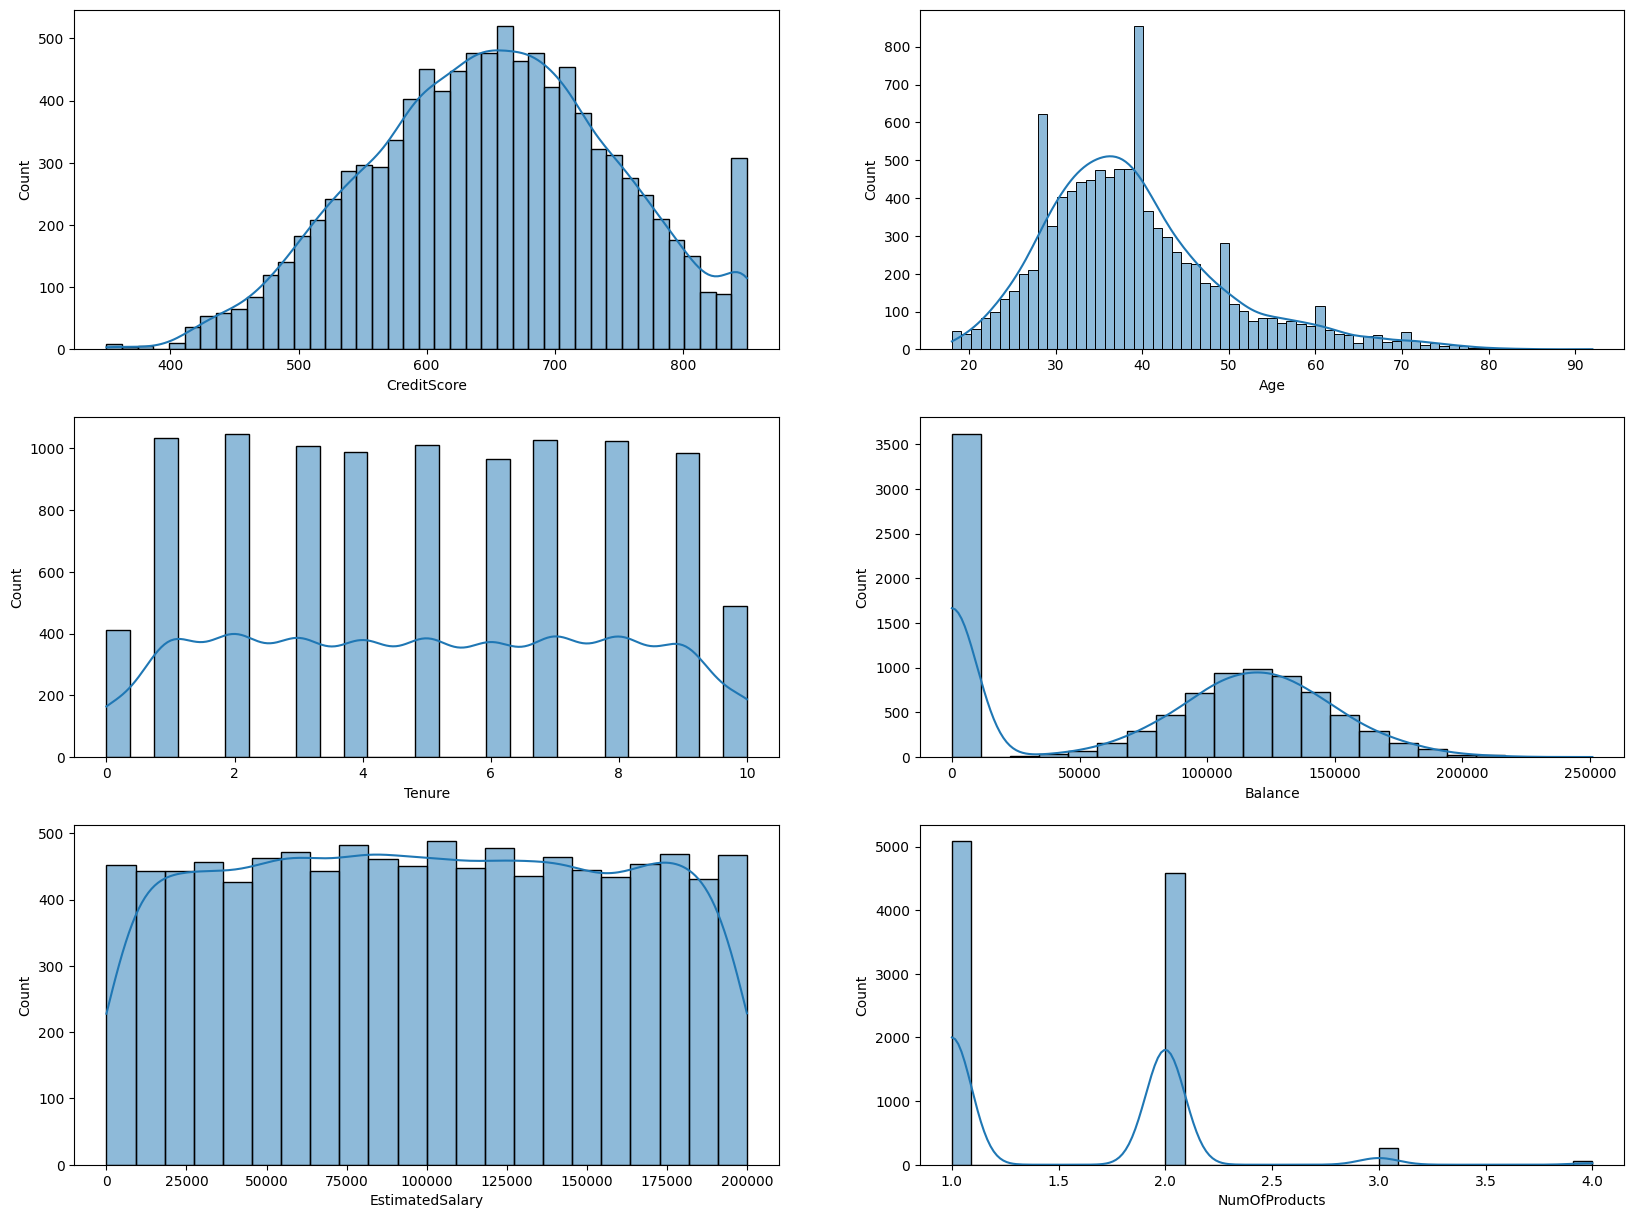

In [15]:
fig , ax = plt.subplots(3, 2, figsize=(20, 15))
sns.histplot(df['CreditScore'], kde=True, ax=ax[0, 0])
sns.histplot(df['Age'], kde=True, ax=ax[0, 1])
sns.histplot(df['Tenure'], kde=True, ax=ax[1, 0])
sns.histplot(df['Balance'], kde=True, ax=ax[1, 1])
sns.histplot(df['EstimatedSalary'], kde=True, ax=ax[2, 0])
sns.histplot(df['NumOfProducts'], kde=True, ax=ax[2, 1])
plt.show()

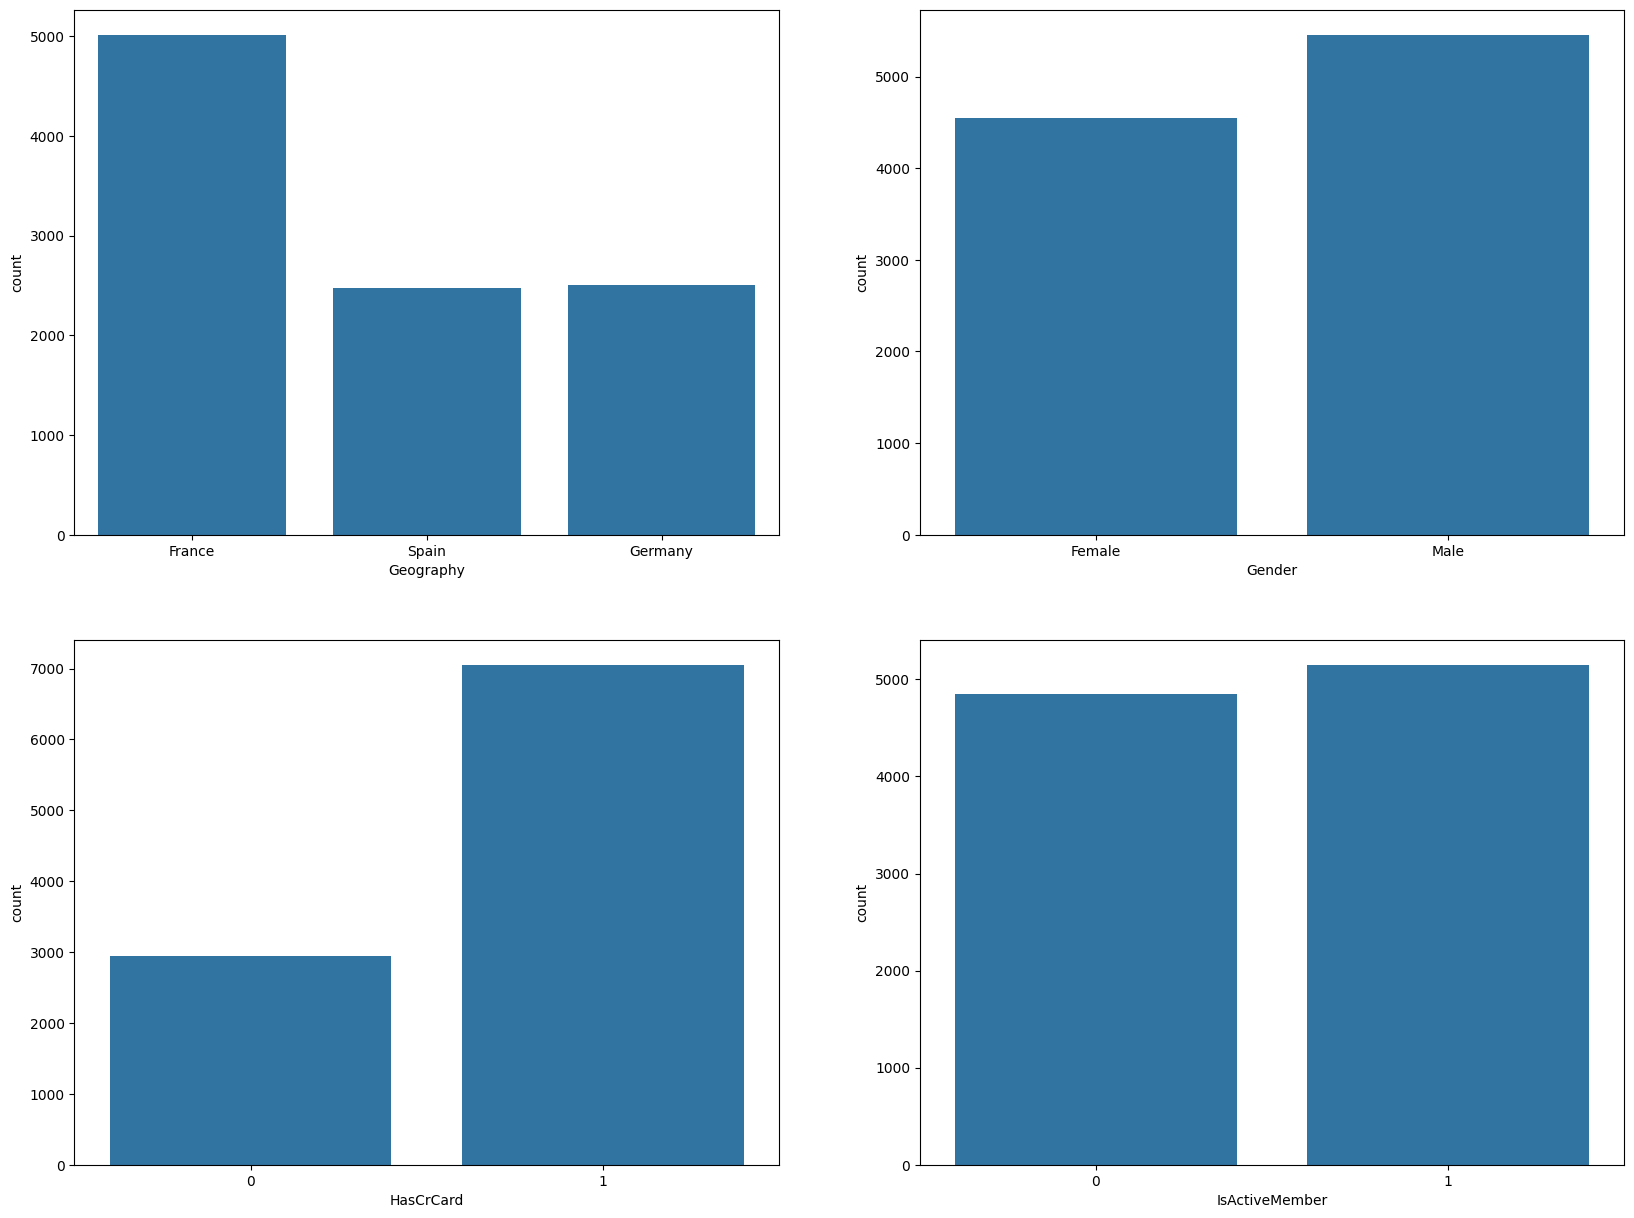

In [16]:
fig , axs = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x='Geography', data=df, ax=axs[0, 0])
sns.countplot(x='Gender', data=df, ax=axs[0, 1])
sns.countplot(x='HasCrCard', data=df, ax=axs[1, 0])
sns.countplot(x='IsActiveMember', data=df, ax=axs[1, 1])
plt.show()

So this observaton give us the idea that the exit custumer variable is depend on this other 10 feature so we can make model in which our exited column is depedent column and the other are indepedncet